In [2]:
# importing modules
import pandas as pd
import urllib.request
import cv2
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import seaborn as sns
from datetime import datetime
from skimage import io

In [3]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data.csv')

In [4]:
data.head(2)

,author,awards,created_utc,downs,id,is_nsfw,media,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,title,ups,url
0,BAG42069,[],1.628380e+09,0,p040e9,False,https://i.redd.it/238mczwev0g71.jpg,r/MemeEconomy,1430077,114.0,https://b.thumbs.redditmedia.com/WBdc-Nus6faSe...,140.0,Invest in ye mudders credit card,167,/r/MemeEconomy/comments/p040e9/invest_in_ye_mu...
1,NaN,[],1.628376e+09,0,p032y2,False,https://www.reddit.com/gallery/p032y2,r/MemeEconomy,1430077,140.0,default,140.0,Invest in laughing cat,0,/r/MemeEconomy/comments/p032y2/invest_in_laugh...


In [ ]:
data.shape

(150273, 15)

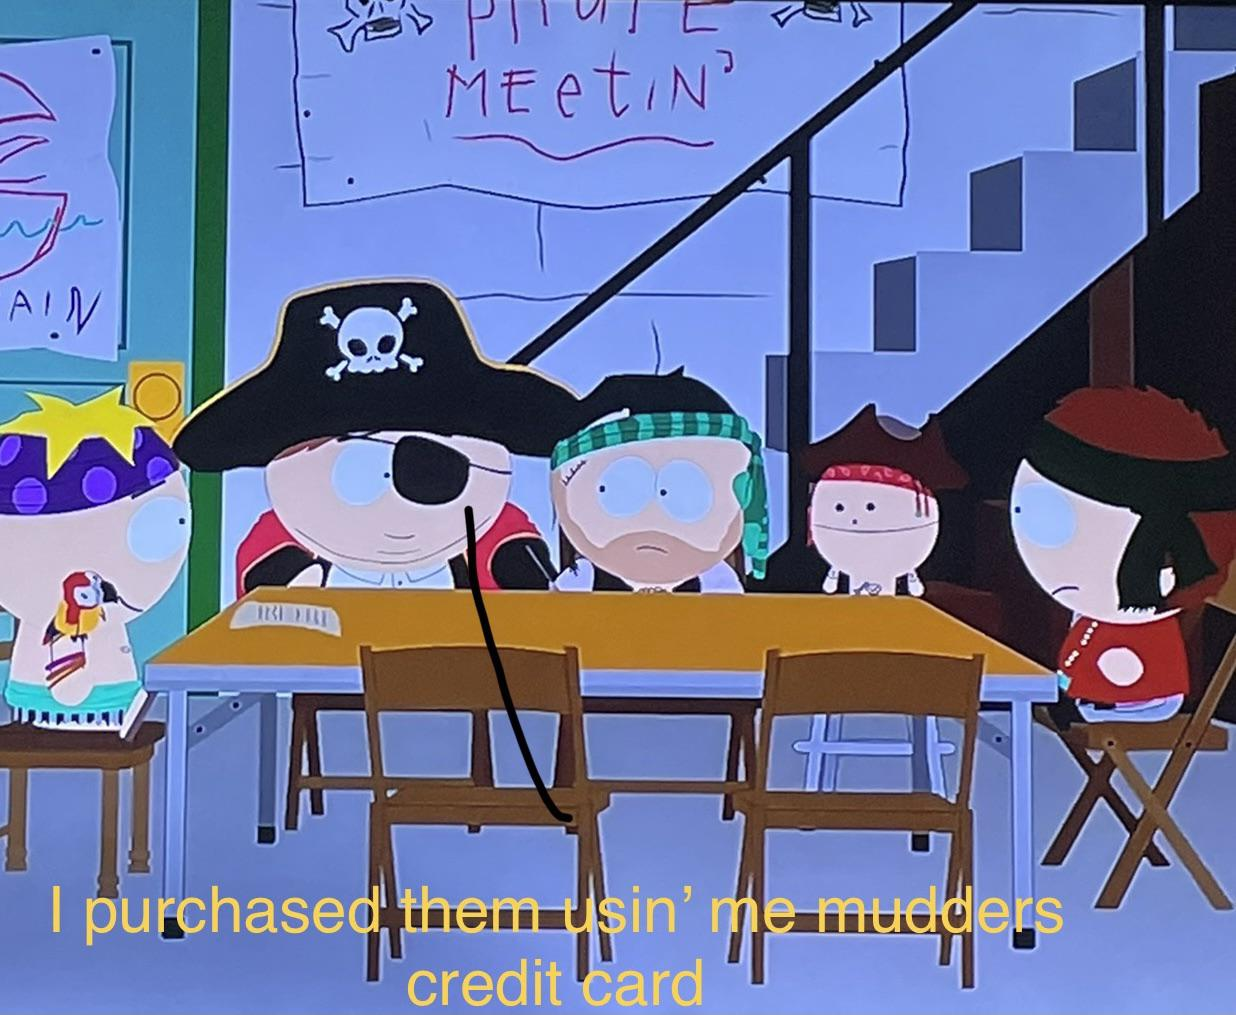

In [ ]:
urllib.request.urlretrieve(data.media.values[0],'image.jpg')
# Read RGB image
img = cv2.imread('image.jpg') 
  
# Output img with window name as 'ima'
cv2_imshow(img)
cv2.waitKey(0)        
  
# Destroying present windows on screen
cv2.destroyAllWindows()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150273 entries, 0 to 150272
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   author               105844 non-null  object 
 1   awards               150273 non-null  object 
 2   created_utc          150273 non-null  float64
 3   downs                150273 non-null  int64  
 4   id                   150273 non-null  object 
 5   is_nsfw              150273 non-null  bool   
 6   media                150273 non-null  object 
 7   subreddit            150273 non-null  object 
 8   subscribers          150273 non-null  int64  
 9   thumbnail.height     147449 non-null  float64
 10  thumbnail.thumbnail  150273 non-null  object 
 11  thumbnail.width      147449 non-null  float64
 12  title                150273 non-null  object 
 13  ups                  150273 non-null  int64  
 14  url                  150273 non-null  object 
dtypes: bool(1), float

In [ ]:
data.awards.unique()

array(['[]',
       "[{'giver_coin_reward': None, 'subreddit_id': None, 'is_new': False, 'days_of_drip_extension': 0, 'coin_price': 125, 'id': 'award_5f123e3d-4f48-42f4-9c11-e98b566d5897', 'penny_donate': None, 'award_sub_type': 'GLOBAL', 'coin_reward': 0, 'icon_url': 'https://i.redd.it/award_images/t5_22cerq/5izbv4fn0md41_Wholesome.png', 'days_of_premium': 0, 'tiers_by_required_awardings': None, 'resized_icons': [{'url': 'https://preview.redd.it/award_images/t5_22cerq/5izbv4fn0md41_Wholesome.png?width=16&height=16&auto=webp&s=92932f465d58e4c16b12b6eac4ca07d27e3d11c0', 'width': 16, 'height': 16}, {'url': 'https://preview.redd.it/award_images/t5_22cerq/5izbv4fn0md41_Wholesome.png?width=32&height=32&auto=webp&s=d11484a208d68a318bf9d4fcf371171a1cb6a7ef', 'width': 32, 'height': 32}, {'url': 'https://preview.redd.it/award_images/t5_22cerq/5izbv4fn0md41_Wholesome.png?width=48&height=48&auto=webp&s=febdf28b6f39f7da7eb1365325b85e0bb49a9f63', 'width': 48, 'height': 48}, {'url': 'https://preview

In [ ]:
data.downs.unique()

array([0])

In [5]:
b = data.groupby('subreddit')['id'].count()
b

subreddit
r/MemeEconomy      1189
r/dankmemes       26149
r/me_irl           8896
r/memes          114039
Name: id, dtype: int64

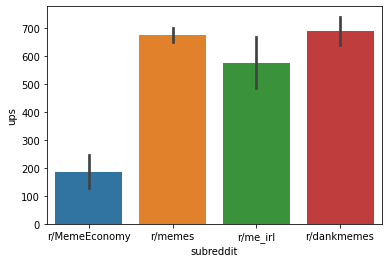

In [ ]:
sns.barplot(x='subreddit',y='ups',data=data)

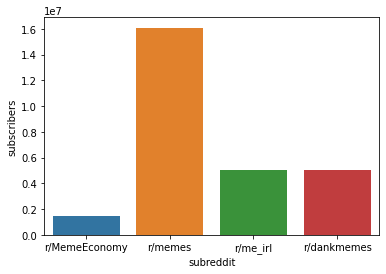

In [ ]:
sns.barplot(x='subreddit',y='subscribers',data=data)

In [ ]:
data = data.drop(['author','awards','downs'],axis=1)

In [ ]:
le = LabelEncoder()
data['subreddit'] = le.fit_transform(data['subreddit'])
data['is_nsfw'] = le.fit_transform(data['is_nsfw'])

In [ ]:
import requests
def isBrokenURL(url):
    if "youtu" in url:
        return True
    try:
        status_code = requests.get(url).status_code
        if status_code in [404,402,403,406,429,503,520,522]:
            return True
    except:
        return True
    return False

In [ ]:
from tqdm  import tqdm
for i in tqdm(range(d ata.shape[0])):
    if isBrokenURL(data['media'][i])==True:
        data = data.drop(i) 

100%|██████████| 150273/150273 [11:21:12<00:00,  3.68it/s]


In [ ]:
data.shape

(107206, 12)

In [ ]:
data.to_csv('/content/drive/MyDrive/case_study_2/input/data_1.csv',index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data_1.csv')

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,created_utc,id,is_nsfw,media,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,title,ups,url
0,1.628380e+09,p040e9,0,https://i.redd.it/238mczwev0g71.jpg,0,1430077,114.0,https://b.thumbs.redditmedia.com/WBdc-Nus6faSe...,140.0,Invest in ye mudders credit card,167,/r/MemeEconomy/comments/p040e9/invest_in_ye_mu...
1,1.628376e+09,p032y2,0,https://www.reddit.com/gallery/p032y2,0,1430077,140.0,default,140.0,Invest in laughing cat,0,/r/MemeEconomy/comments/p032y2/invest_in_laugh...
2,1.628376e+09,p031xx,0,https://www.reddit.com/gallery/p031xx,0,1430077,140.0,default,140.0,Invest in laughing cat,1,/r/MemeEconomy/comments/p031xx/invest_in_laugh...
3,1.628370e+09,p01bnz,0,https://i.redd.it/jh8cv3yx20g71.jpg,0,1430077,84.0,default,140.0,Who is it? Winding me up all day,1,/r/MemeEconomy/comments/p01bnz/who_is_it_windi...
4,1.628370e+09,p01azg,0,https://i.redd.it/uptr4nkr20g71.jpg,0,1430077,84.0,default,140.0,??,1,/r/MemeEconomy/comments/p01azg/_/
...,...,...,...,...,...,...,...,...,...,...,...,...
107201,1.626222e+09,ojsmip,0,https://i.redd.it/p4r5nxi2n2b71.jpg,1,5070468,140.0,https://b.thumbs.redditmedia.com/WG_mAtmVENUPo...,140.0,Mistakes were made,20,/r/dankmemes/comments/ojsmip/mistakes_were_made/
107202,1.626222e+09,ojskuj,0,https://i.redd.it/5iy6912lm2b71.jpg,1,5070468,140.0,https://b.thumbs.redditmedia.com/UzwVkquo3l_kI...,140.0,Like wtf,29,/r/dankmemes/comments/ojskuj/like_wtf/
107203,1.626221e+09,ojsf4l,0,https://i.redd.it/iw0kw83yk2b71.jpg,1,5070468,140.0,default,140.0,*insert anime op here,1,/r/dankmemes/comments/ojsf4l/insert_anime_op_h...
107204,1.626221e+09,ojseih,0,https://i.redd.it/1ich1f5sk2b71.jpg,1,5070468,97.0,default,140.0,Remove this if you u don’t support lgbqt+,1,/r/dankmemes/comments/ojseih/remove_this_if_yo...


In [ ]:
from urllib.request import urlopen,Request
def is_url_image(image_url):
    image_formats = ("image/png","image/jpeg", "image/jpg")
    try:
        req = Request(image_url, headers={'User-Agent': 'Mozilla/5.0'})
        if urlopen(req).info()['content-type'] in image_formats:
            return True
    except:
        return False
    return False


In [ ]:
for i in tqdm(range(107206)):
    if is_url_image(data.loc[i]['media'])==False:
        data = data.drop(i)


100%|██████████| 107206/107206 [2:05:07<00:00, 14.28it/s]


In [ ]:
data.shape

(94871, 12)

In [ ]:
data.to_csv('/content/drive/MyDrive/case_study_2/input/data_2u.csv',index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data_2u.csv')

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.shape

(94871, 12)

In [ ]:
ext = []
for i in tqdm(range(data.shape[0])):
    if data.media.values[i][-4]=='.':
        ext.append(data.media.values[i][-3:])
    else:
        ext.append(data.media.values[i][-4:])

100%|██████████| 94871/94871 [00:01<00:00, 89391.57it/s]


In [ ]:
print(set(ext))

{'mp4', 'uman', '90fc', 'NQ==', 'cale', '2422', 'ef59', 'mall', 'jpeg', 'play', 'gifv', '59b8', 'gif', 'png', '0b73', '=669', 'a32f', '4-no', 'A05E', '6a90', 'jpg', '=CAU'}


In [ ]:
x = []
for i in tqdm(range(data.shape[0])):
    if data.media.values[i][-3:]=='jpg' or data.media.values[i][-3:]=='png' or data.media.values[i][-4:]=='jpeg':
        pass
    else:
        x.append(i)

100%|██████████| 94871/94871 [00:00<00:00, 136987.48it/s]


In [ ]:
data = data.drop(data.index[x])

In [ ]:
data.shape

(94666, 12)

In [ ]:
data.to_csv('/content/drive/MyDrive/case_study_2/input/data_3u.csv',index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data_3u.csv')

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,created_utc,id,is_nsfw,media,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,title,ups,url
0,1.628380e+09,p040e9,0,https://i.redd.it/238mczwev0g71.jpg,0,1430077,114.0,https://b.thumbs.redditmedia.com/WBdc-Nus6faSe...,140.0,Invest in ye mudders credit card,167,/r/MemeEconomy/comments/p040e9/invest_in_ye_mu...
1,1.628370e+09,p01bnz,0,https://i.redd.it/jh8cv3yx20g71.jpg,0,1430077,84.0,default,140.0,Who is it? Winding me up all day,1,/r/MemeEconomy/comments/p01bnz/who_is_it_windi...
2,1.628370e+09,p01azg,0,https://i.redd.it/uptr4nkr20g71.jpg,0,1430077,84.0,default,140.0,??,1,/r/MemeEconomy/comments/p01azg/_/
3,1.628366e+09,p002qn,0,https://i.redd.it/4yacuh18qzf71.jpg,0,1430077,140.0,https://b.thumbs.redditmedia.com/avzbtegaypC3l...,140.0,Invest in bio-security,60,/r/MemeEconomy/comments/p002qn/invest_in_biose...
4,1.628364e+09,ozzmum,0,https://i.redd.it/fkqta3ctlzf71.jpg,0,1430077,140.0,default,140.0,INVEST in Jontron slicing the price in half! A...,15,/r/MemeEconomy/comments/ozzmum/invest_in_jontr...
...,...,...,...,...,...,...,...,...,...,...,...,...
94661,1.626222e+09,ojsmip,0,https://i.redd.it/p4r5nxi2n2b71.jpg,1,5070468,140.0,https://b.thumbs.redditmedia.com/WG_mAtmVENUPo...,140.0,Mistakes were made,20,/r/dankmemes/comments/ojsmip/mistakes_were_made/
94662,1.626222e+09,ojskuj,0,https://i.redd.it/5iy6912lm2b71.jpg,1,5070468,140.0,https://b.thumbs.redditmedia.com/UzwVkquo3l_kI...,140.0,Like wtf,29,/r/dankmemes/comments/ojskuj/like_wtf/
94663,1.626221e+09,ojsf4l,0,https://i.redd.it/iw0kw83yk2b71.jpg,1,5070468,140.0,default,140.0,*insert anime op here,1,/r/dankmemes/comments/ojsf4l/insert_anime_op_h...
94664,1.626221e+09,ojseih,0,https://i.redd.it/1ich1f5sk2b71.jpg,1,5070468,97.0,default,140.0,Remove this if you u don’t support lgbqt+,1,/r/dankmemes/comments/ojseih/remove_this_if_yo...


In [ ]:
import sys , numpy
y = []
count = 0
for i in tqdm(range(data.shape[0])):
    try:          
        urllib.request.urlretrieve(data.loc[i].media,'f.jpg')
        # Read RGB image
        img1 = cv2.imread('f.jpg')
        if type(img == img1) is numpy.ndarray and (img == img1).all():
            y.append(i) 
            count =  count +1
    except (IOError,SyntaxError) as e:
            y.append(i)
            count=count+1
print(count)

  0%|          | 0/94666 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
100%|██████████| 94666/94666 [3:33:53<00:00,  7.38it/s]

231


In [ ]:
data = data.drop(data.index[y])

In [ ]:
data.shape

(94435, 12)

In [ ]:
data = data.drop(data[data.media.duplicated()==True].index)

In [ ]:
data.shape

(93315, 12)

In [2]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data_4.csv')

In [ ]:
data = data[~(data.ups==0)]

In [ ]:
data.ups.value_counts()

1        23014
2         1170
28        1077
29        1040
26        1036
         ...  
3431         1
11683        1
3495         1
38324        1
8356         1
Name: ups, Length: 7110, dtype: int64

In [ ]:
data[data.ups==1]

,created_utc,id,is_nsfw,media,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,title,ups,url
1,1.628370e+09,p01bnz,0,https://i.redd.it/jh8cv3yx20g71.jpg,0,1430077,84.0,default,140.0,Who is it? Winding me up all day,1,/r/MemeEconomy/comments/p01bnz/who_is_it_windi...
2,1.628370e+09,p01azg,0,https://i.redd.it/uptr4nkr20g71.jpg,0,1430077,84.0,default,140.0,??,1,/r/MemeEconomy/comments/p01azg/_/
5,1.628361e+09,ozynmx,0,https://i.redd.it/dhmta774czf71.jpg,0,1430077,140.0,default,140.0,to the moon,1,/r/MemeEconomy/comments/ozynmx/to_the_moon/
11,1.628346e+09,ozu6wa,0,https://i.redd.it/jzh96hhw3yf71.jpg,0,1430077,140.0,default,140.0,Freshly Cinna-Minted,1,/r/MemeEconomy/comments/ozu6wa/freshly_cinnami...
13,1.628341e+09,ozsp8r,0,https://i.redd.it/xfunapojnxf71.png,0,1430077,140.0,default,140.0,Turtle mem,1,/r/MemeEconomy/comments/ozsp8r/turtle_mem/
...,...,...,...,...,...,...,...,...,...,...,...,...
93295,1.626224e+09,ojtamz,0,https://i.redd.it/f6l4nm30u2b71.jpg,1,5070468,140.0,default,140.0,Family,1,/r/dankmemes/comments/ojtamz/family/
93296,1.626224e+09,ojt9c5,0,https://i.redd.it/j9wf6qjmt2b71.jpg,1,5070468,140.0,default,140.0,Idk what to title,1,/r/dankmemes/comments/ojt9c5/idk_what_to_title/
93308,1.626222e+09,ojspqy,0,https://i.redd.it/7ylbi5dzn2b71.jpg,1,5070468,130.0,default,140.0,😂😂😂😂 its true tho,1,/r/dankmemes/comments/ojspqy/its_true_tho/
93312,1.626221e+09,ojsf4l,0,https://i.redd.it/iw0kw83yk2b71.jpg,1,5070468,140.0,default,140.0,*insert anime op here,1,/r/dankmemes/comments/ojsf4l/insert_anime_op_h...


In [ ]:
ind_10000 = data[data.ups==1].index[:10000]

In [ ]:
len(ind_10000)

10000

In [ ]:
data = data.drop(data.index[ind_10000])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


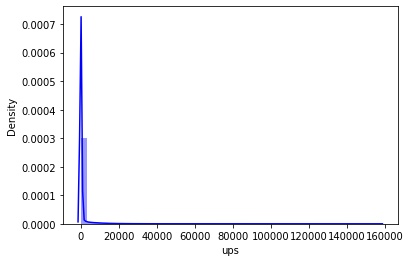

In [ ]:
sns.distplot(data['ups'], color='b')

In [ ]:
data['upvote ratio'] = data['ups'] / data['subscribers']

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.head()

,created_utc,id,is_nsfw,media,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,title,ups,url,upvote ratio
0,1.628380e+09,p040e9,0,https://i.redd.it/238mczwev0g71.jpg,0,1430077,114.0,https://b.thumbs.redditmedia.com/WBdc-Nus6faSe...,140.0,Invest in ye mudders credit card,167,/r/MemeEconomy/comments/p040e9/invest_in_ye_mu...,0.000117
1,1.628366e+09,p002qn,0,https://i.redd.it/4yacuh18qzf71.jpg,0,1430077,140.0,https://b.thumbs.redditmedia.com/avzbtegaypC3l...,140.0,Invest in bio-security,60,/r/MemeEconomy/comments/p002qn/invest_in_biose...,0.000042
2,1.628364e+09,ozzmum,0,https://i.redd.it/fkqta3ctlzf71.jpg,0,1430077,140.0,default,140.0,INVEST in Jontron slicing the price in half! A...,15,/r/MemeEconomy/comments/ozzmum/invest_in_jontr...,0.000010
3,1.628359e+09,ozxznf,0,https://i.imgur.com/HKLQZ7N.jpg,0,1430077,107.0,default,140.0,Invest right now,2,/r/MemeEconomy/comments/ozxznf/invest_right_now/,0.000001
4,1.628357e+09,ozxfph,0,https://i.redd.it/xv0li2430zf71.png,0,1430077,140.0,https://b.thumbs.redditmedia.com/2GQTtYFKN3Om9...,140.0,Invest in Elmo in Vietnam,26,/r/MemeEconomy/comments/ozxfph/invest_in_elmo_...,0.000018


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


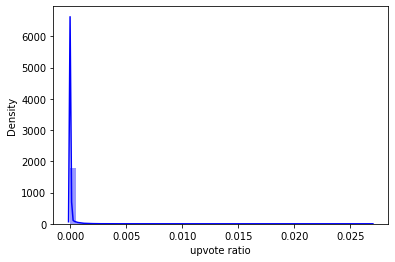

In [ ]:
sns.distplot(data['upvote ratio'], color='b')

In [ ]:
import numpy as np
temp = data['upvote ratio'].values
temp = sorted(temp)
for i in range(90,101,1):
    percentile = np.percentile(temp,i)
    print(i,"th percentile is ",percentile)
percentile_95th = np.percentile(temp,95)

90 th percentile is  5.2296315988776976e-05
91 th percentile is  7.381759681768664e-05
92 th percentile is  0.00011082551305392685
93 th percentile is  0.00016559030571312844
94 th percentile is  0.00024073045676025902
95 th percentile is  0.00034969587769801514
96 th percentile is  0.0004946362856753355
97 th percentile is  0.0006886551250472431
98 th percentile is  0.0009926022839900968
99 th percentile is  0.0016133055875229532
100 th percentile is  0.026876879957327137


In [ ]:
data[data['upvote ratio']>=percentile_95th].shape

(4166, 13)

In [ ]:
data['dank_level'] = data['upvote ratio'].apply(lambda x:1 if x>=percentile_95th else 0)

In [ ]:
data['dank_level'].value_counts()

0    79149
1     4166
Name: dank_level, dtype: int64

In [ ]:
data.shape

(83315, 14)

In [4]:
data['hour'] = data['created_utc'].apply(lambda x:datetime.fromtimestamp(x).hour)

In [5]:
def time_of_day(x):
    if x<=4:
        return 0
    elif x>4 and x<=8:
        return 1
    elif x>8 and x<=12:
        return 2
    elif x>12 and x<=16:
        return 3
    elif x>12 and x<=20:
        return 4
    else: 
        return 5
data['Time_of_day'] = data['hour'].apply(lambda x:time_of_day(x))

In [6]:
data = data.drop('hour',axis=1)

In [ ]:
data.shape

(83315, 13)

In [ ]:
data.head(2)

,created_utc,id,is_nsfw,media,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,title,ups,url,upvote ratio,dank_level
0,1.628380e+09,p040e9,0,https://i.redd.it/238mczwev0g71.jpg,0,1430077,114.0,https://b.thumbs.redditmedia.com/WBdc-Nus6faSe...,140.0,Invest in ye mudders credit card,167,/r/MemeEconomy/comments/p040e9/invest_in_ye_mu...,6.213456e-08,0
1,1.628366e+09,p002qn,0,https://i.redd.it/4yacuh18qzf71.jpg,0,1430077,140.0,https://b.thumbs.redditmedia.com/avzbtegaypC3l...,140.0,Invest in bio-security,60,/r/MemeEconomy/comments/p002qn/invest_in_biose...,6.213456e-08,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83315 entries, 0 to 83314
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_utc          83315 non-null  float64
 1   id                   83315 non-null  object 
 2   is_nsfw              83315 non-null  int64  
 3   media                83315 non-null  object 
 4   subreddit            83315 non-null  int64  
 5   subscribers          83315 non-null  int64  
 6   thumbnail.height     83244 non-null  float64
 7   thumbnail.thumbnail  83315 non-null  object 
 8   thumbnail.width      83244 non-null  float64
 9   title                83315 non-null  object 
 10  ups                  83315 non-null  int64  
 11  url                  83315 non-null  object 
 12  upvote ratio         83315 non-null  float64
 13  dank_level           83315 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 8.9+ MB


In [ ]:
list(data)

['created_utc',
 'id',
 'is_nsfw',
 'media',
 'subreddit',
 'subscribers',
 'thumbnail.height',
 'thumbnail.thumbnail',
 'thumbnail.width',
 'title',
 'ups',
 'url',
 'upvote ratio',
 'dank_level']

In [36]:
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83244 entries, 0 to 83243
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_utc          83244 non-null  float64
 1   id                   83244 non-null  object 
 2   is_nsfw              83244 non-null  int64  
 3   media                83244 non-null  object 
 4   subreddit            83244 non-null  int64  
 5   subscribers          83244 non-null  int64  
 6   thumbnail.height     83244 non-null  float64
 7   thumbnail.thumbnail  83244 non-null  object 
 8   thumbnail.width      83244 non-null  float64
 9   title                83244 non-null  object 
 10  ups                  83244 non-null  int64  
 11  url                  83244 non-null  object 
 12  upvote ratio         83244 non-null  float64
 13  dank_level           83244 non-null  int64  
 14  Time_of_day          83244 non-null  int64  
dtypes: float64(4), int64(6), object(5)
m

In [7]:
data.to_csv('/content/drive/MyDrive/case_study_2/input/data_4u.csv',index=False)